In [ ]:
_Names of group members_:

Olivia Ngueguim Tsague, Oluwaseun Babarinde , Olalekan Ogunsola

In [ ]:
#1) Print the number of rows and columns in the dataset.
#2) Print the descriptive stats for the numerical columns.
#3) Print the number of nan/missing/null values in all the columns.
#4) Drop the columns 'name', 'host_id', 'host_name', 'latitude', 'longitude'  from the dataset using .drop([column names]) command. Print the restructured dataset.
#5) Check to see if there are any duplicate rows. Print the numbers.
#6) Drop the rows where availability is 0 since that means the listing is no longer active. Print the number of rows and columns in the new dataset.
#7) Check for outliers in "price" column and drop the outliers. [2 points]
#8) For each neighbourhood group, find average price and availability. Visualize them with suitable plots. [2 points]

In [187]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

In [189]:
# Importing dataset
df=pd.read_csv('AB_NYC_2019.xls') 

display(df.head())
display(df.info())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None

In [190]:
#1) Print the number of rows and columns in the dataset.
print("Dataset shape:",df.shape)

# Rows
print("\nNumber of rows:", 48895)
# Columns
print("\nNumber of columns:", 16)

Dataset shape: (48895, 16)

Number of rows: 48895

Number of columns: 16


In [191]:
#2) Print the descriptive stats for the numerical columns.

print("\nDescriptive statistics for numerical columns:\n")
df.describe()


Descriptive statistics for numerical columns:



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [192]:
#3) Print the number of nan/missing/null values in all the columns.
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [193]:
#4) Drop the columns 'name', 'host_id', 'host_name', 'latitude', 'longitude'  from the dataset using .drop([column names]) command.
# Print the restructured dataset.

df_res = df.drop(['name', 'host_id', 'host_name', 'latitude', 'longitude'], axis=1)
print("\nRestructured dataset:\n")
display(df_res.head())



Restructured dataset:



,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [194]:
#5) Checking to see if there are any duplicate rows. Print the numbers.
df= df_res.duplicated().sum()

# Print the numbers.
print("\nNumber of duplicate rows:", df)



Number of duplicate rows: 0


In [195]:
#6) Drop the rows where availability is 0 since that means the listing is no longer active. Print the number of rows and columns in the new dataset.
print("Dataset shape:",df_res.shape)
df_res1 = df_res[df_res["availability_365"] != 0]

# Print the new dataset
print("\nDataset after dropping inactive listings:")
print("\nDataset shape after dropping:",df_res1.shape)
display(df_res1.head())
print(df_res1)


Dataset shape: (48895, 11)

Dataset after dropping inactive listings:

Dataset shape after dropping: (31362, 11)


,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


             id neighbourhood_group       neighbourhood        room_type  \
0          2539            Brooklyn          Kensington     Private room   
1          2595           Manhattan             Midtown  Entire home/apt   
2          3647           Manhattan              Harlem     Private room   
3          3831            Brooklyn        Clinton Hill  Entire home/apt   
5          5099           Manhattan         Murray Hill  Entire home/apt   
...         ...                 ...                 ...              ...   
48890  36484665            Brooklyn  Bedford-Stuyvesant     Private room   
48891  36485057            Brooklyn            Bushwick     Private room   
48892  36485431           Manhattan              Harlem  Entire home/apt   
48893  36485609           Manhattan      Hell's Kitchen      Shared room   
48894  36487245           Manhattan      Hell's Kitchen     Private room   

       price  minimum_nights  number_of_reviews last_review  \
0        149            

Check for outliers in 'price'



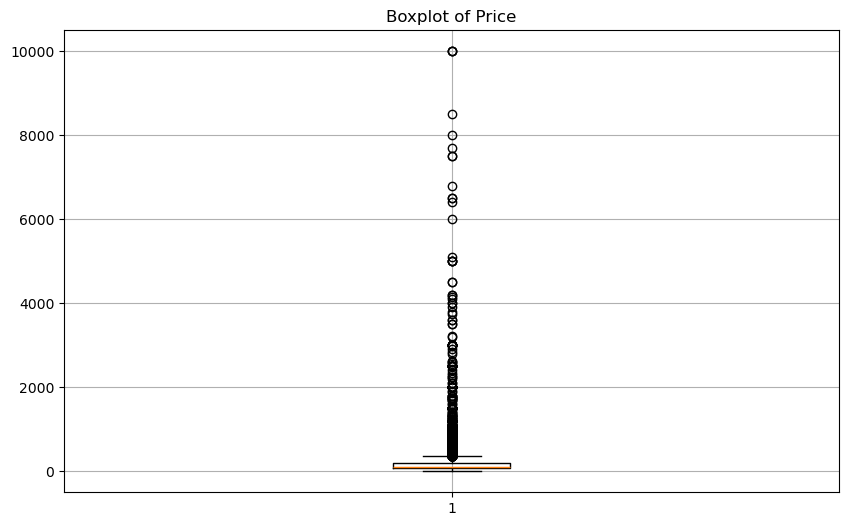

Check for outliers in 'price with ZOOM'



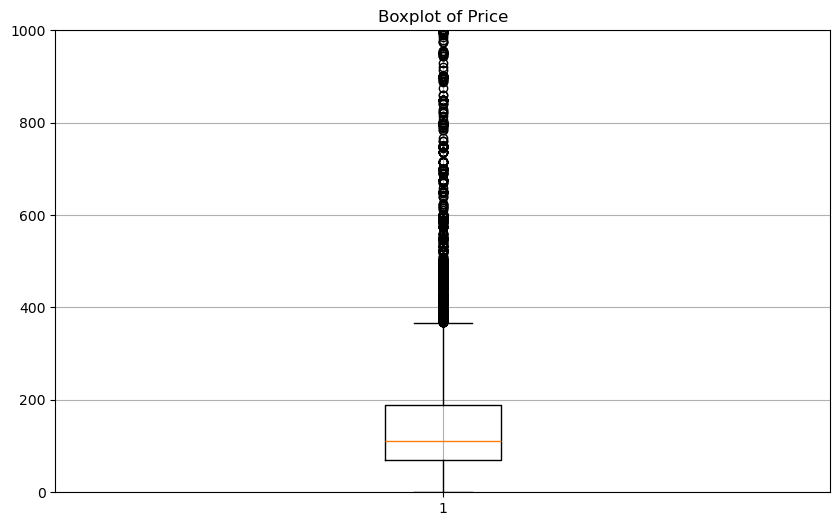


Rows after outlier removal: 29501


In [196]:
#7) Check for outliers in "price" column 
plt.boxplot(df_res1['price'])
plt.title("Boxplot of Price")
print("Check for outliers in 'price'\n")
plt.show()

# With zoom
plt.boxplot(df_res1['price'])
plt.ylim(0, 1000)
plt.title("Boxplot of Price")
print("Check for outliers in 'price with ZOOM'\n")
plt.show()

# Drop the outliers. [2 points]
Q1 = df_res1['price'].quantile(0.25)
Q3 = df_res1['price'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df_res1 = df_res1[(df_res1['price'] >= lower) & (df_res1['price'] <= upper)]
print("\nRows after outlier removal:", len(df_res1))

Average price and availability by neighbourhood group

  neighbourhood_group   avg_price  avg_availability
0               Bronx   78.802895        196.538976
1            Brooklyn  112.227772        163.177316
2           Manhattan  156.880865        174.092934
3              Queens   91.303567        189.275455
4       Staten Island   88.261538        224.495385 



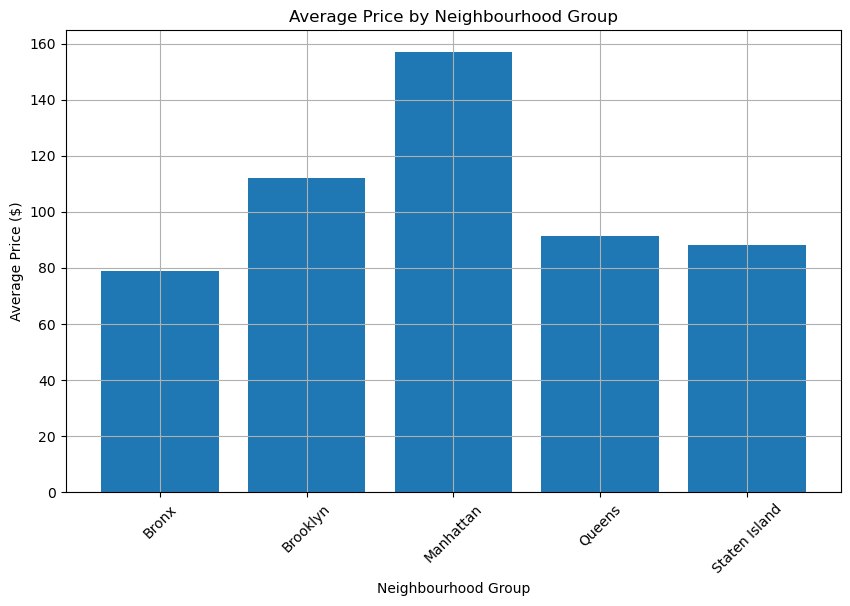

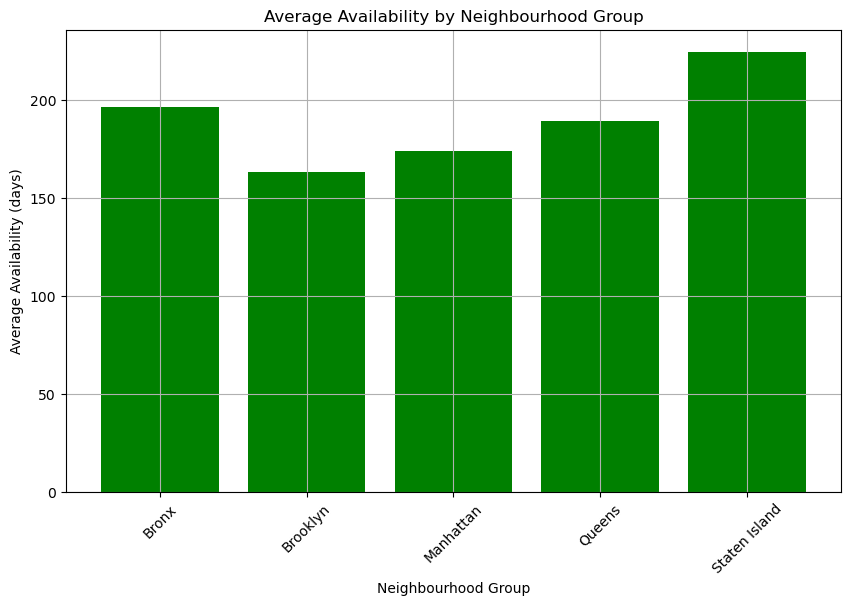

In [197]:
#8) For each neighbourhood group, find average price and availability. 

# Group by neighbourhood group and calculate average price & availability
df_res2 = df_res1.groupby("neighbourhood_group")[["price", "availability_365"]].mean().reset_index()
df_res2.rename(columns={"price": "avg_price", "availability_365": "avg_availability"}, inplace=True)

print("Average price and availability by neighbourhood group\n")
print(df_res2, "\n")

# Visualize them with suitable plots
# Average Price Plot 
plt.figure()
plt.bar(df_res2["neighbourhood_group"], df_res2["avg_price"])
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()

#  Average Availability Plot 
plt.figure()
plt.bar(df_res2["neighbourhood_group"], df_res2["avg_availability"], color="green")
plt.title("Average Availability by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Availability (days)")
plt.xticks(rotation=45)
plt.show()